<a href="https://colab.research.google.com/github/Yogesh6301/Social-distancing-project-using-YOLO/blob/main/21_Dec_Deep_Learning_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
ls

sample_data/  yolov3.weights


In [ ]:
!wget https://wallpapercave.com/wp/wp2406637.jpg -O image.jpg

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving yolov3.cfg to yolov3.cfg
Saving coco.names to coco.names


{'coco.names': b'person\nbicycle\ncar\nmotorbike\naeroplane\nbus\ntrain\ntruck\nboat\ntraffic light\nfire hydrant\nstop sign\nparking meter\nbench\nbird\ncat\ndog\nhorse\nsheep\ncow\nelephant\nbear\nzebra\ngiraffe\nbackpack\numbrella\nhandbag\ntie\nsuitcase\nfrisbee\nskis\nsnowboard\nsports ball\nkite\nbaseball bat\nbaseball glove\nskateboard\nsurfboard\ntennis racket\nbottle\nwine glass\ncup\nfork\nknife\nspoon\nbowl\nbanana\napple\nsandwich\norange\nbroccoli\ncarrot\nhot dog\npizza\ndonut\ncake\nchair\nsofa\npottedplant\nbed\ndiningtable\ntoilet\ntvmonitor\nlaptop\nmouse\nremote\nkeyboard\ncell phone\nmicrowave\noven\ntoaster\nsink\nrefrigerator\nbook\nclock\nvase\nscissors\nteddy bear\nhair drier\ntoothbrush',
 'yolov3.cfg': b'[net]\n# Testing\n# batch=1\n# subdivisions=1\n# Training\nbatch=64\nsubdivisions=16\nwidth=608\nheight=608\nchannels=3\nmomentum=0.9\ndecay=0.0005\nangle=0\nsaturation = 1.5\nexposure = 1.5\nhue=.1\n\nlearning_rate=0.001\nburn_in=1000\nmax_batches = 500200\np

In [ ]:
ls

coco.names  sample_data/  yolov3.cfg  yolov3.weights


In [ ]:
import cv2
import numpy as np
import os

In [ ]:
labelsPath = "./coco.names"
confPath = "./yolov3.cfg"
weightPath = "./yolov3.weights"

In [ ]:
Labels = open(labelsPath).read().strip().split("\n")

In [ ]:
!wget https://www.techsimplus.com/media/Screenshot_2020-06-13_at_7.41.41_AM.png -O image.png

In [ ]:
ImageShape = (416, 416)
image = cv2.imread("image.png")

In [ ]:
H, W = image.shape[:2]

In [ ]:
preImage = cv2.dnn.blobFromImage(image, 1/255.0, ImageShape, swapRB = True)

In [ ]:
model = cv2.dnn.readNetFromDarknet(confPath, weightPath)

In [ ]:
layers = model.getUnconnectedOutLayersNames()

In [ ]:
model.setInput(preImage)

In [ ]:
Pred = model.forward(layers)

In [ ]:
len(Pred[2][332])

85

In [ ]:
for layerOut in Pred:
  for detection in layerOut:
    scores = detection[5:]
    classId = np.argmax(scores)
    conf = scores[classId]
    if conf > 0.7:
      objectName = Labels[classId]
      CenterX, CenterY, w, h = (detection[:4] * np.array([W, H, W, H])).astype(int)
      X = CenterX - (w//2)
      Y = CenterY - (h//2)
      image = cv2.rectangle(image, (X, Y), (X + w, Y + h), (0, 0, 255), 2)
      image = cv2.putText(image, objectName, (X, Y - 20), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 0, 255), 3)


In [ ]:
cv2.imwrite("detectEd.jpg", image)

True

In [ ]:
ls

coco.names  detectEd.jpg  image.jpg  sample_data/  yolov3.cfg  yolov3.weights


In [ ]:
from PIL import Image

In [ ]:
#Image.open("detectEd.jpg")

In [ ]:
### Person Detection...

In [ ]:
Person = []
X1 = []
X2 = []

Y1 = []
Y2 = []
 
Cx = []
Cy = []

numP = 0

In [ ]:
for layerOut in Pred:
  for detection in layerOut:
    scores = detection[5:]
    classId = np.argmax(scores)
    conf = scores[classId]
    if conf > 0.8:
      Object = Labels[classId]
      if Object == 'person':
        numP += 1
        CenterX, CenterY, w, h = (detection[:4] * np.array([W, H, W, H])).astype(int)
        X = int(CenterX - (w//2))
        Y = int(CenterY - (h//2))

        ## Store this Data 
        X1.append(X)
        Y1.append(Y)
        X2.append(X + w)
        Y2.append(Y + h)
        Cx.append(CenterX)
        Cy.append(CenterY)

        Person.append(f"Person-{numP}")

        image = cv2.rectangle(image, (X, Y), (X + w, Y + h), (0, 255, 0), 2)
        image = cv2.putText(image, f"Person-{numP}", (X, Y - 20), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 3)

cv2.imwrite("Object_Image.png", image)




True

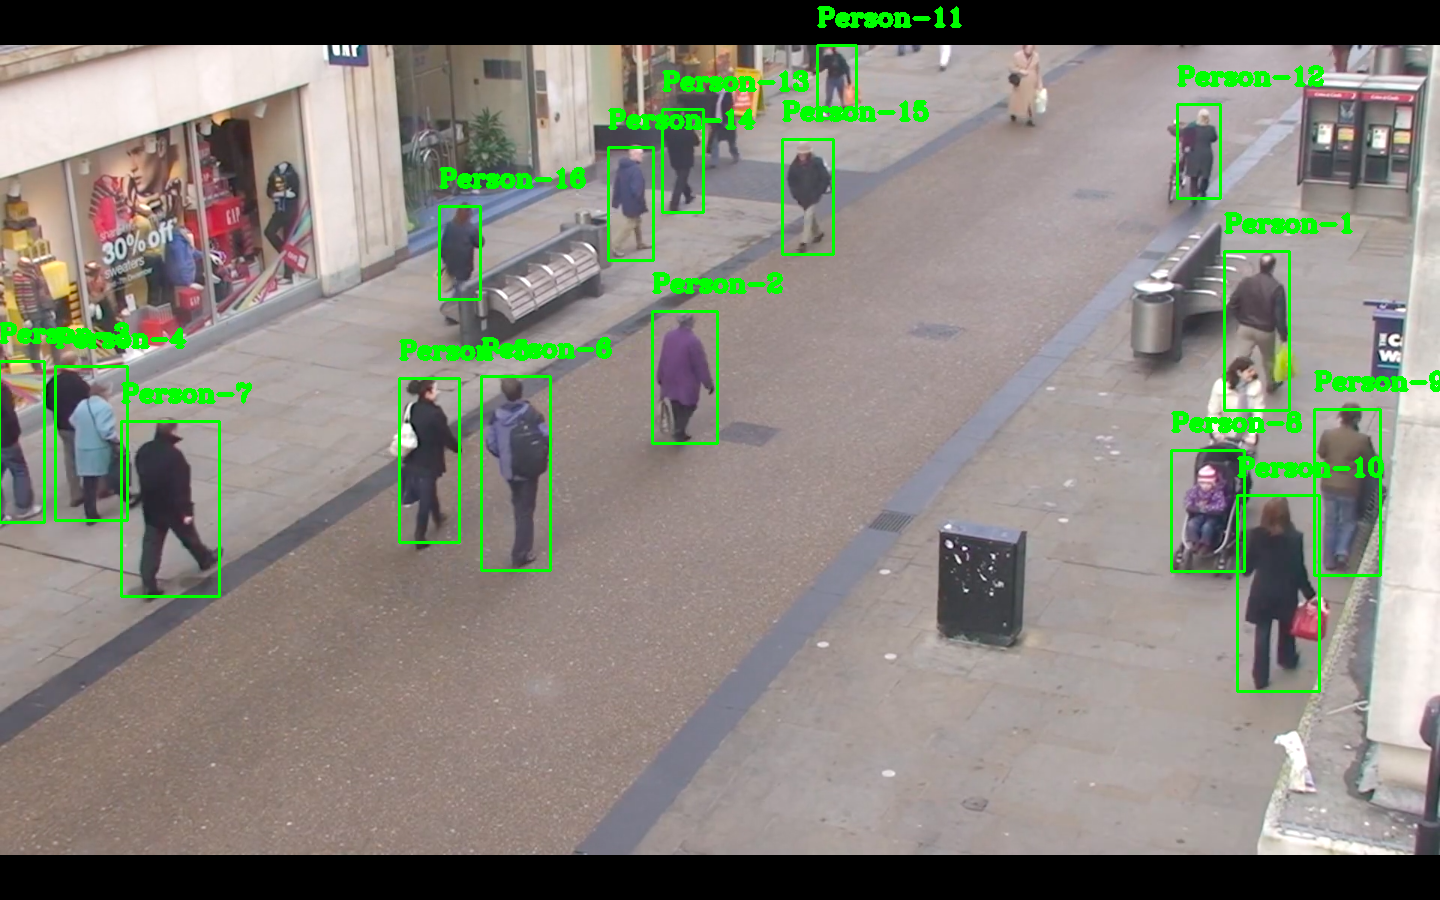

In [ ]:
Image.open("Object_Image.png")

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    "Person":Person, 
    "X1":X1, "Y1":Y1,
    "X2":X2, "Y2":Y2,
    "Cx":Cx, "Cy":Cy,
})

In [ ]:
df

,Person,X1,Y1,X2,Y2,Cx,Cy
0,Person-1,1224,251,1289,410,1256,330
1,Person-2,652,311,717,443,684,377
2,Person-3,-1,361,44,522,21,441
3,Person-4,55,366,127,520,91,443
4,Person-5,399,378,459,542,429,460
5,Person-6,481,376,550,570,515,473
6,Person-7,121,421,219,596,170,508
7,Person-8,1171,450,1244,571,1207,510
8,Person-9,1314,409,1380,575,1347,492
9,Person-10,1237,495,1319,691,1278,593


In [ ]:
Total_Person = len(df)

In [ ]:
for i in range(Total_Person):
  for j in range(i+1, Total_Person):
    Person1 = df.iloc[i, :].values
    Person2 = df.iloc[j, :].values
    distance = np.sqrt((df["Cx"][i] - df["Cx"][j])**2 + (df["Cy"][i] - df["Cy"][j])**2)
    color = (0, 0, 255)
    if distance < 100:
      image = cv2.rectangle(image, tuple(Person1[1:3]), tuple(Person1[3:5]), color, 2)
      image = cv2.rectangle(image, tuple(Person2[1:3]), tuple(Person2[3:5]), color, 2)
    
cv2.imwrite("FinalImage.png", image)




True

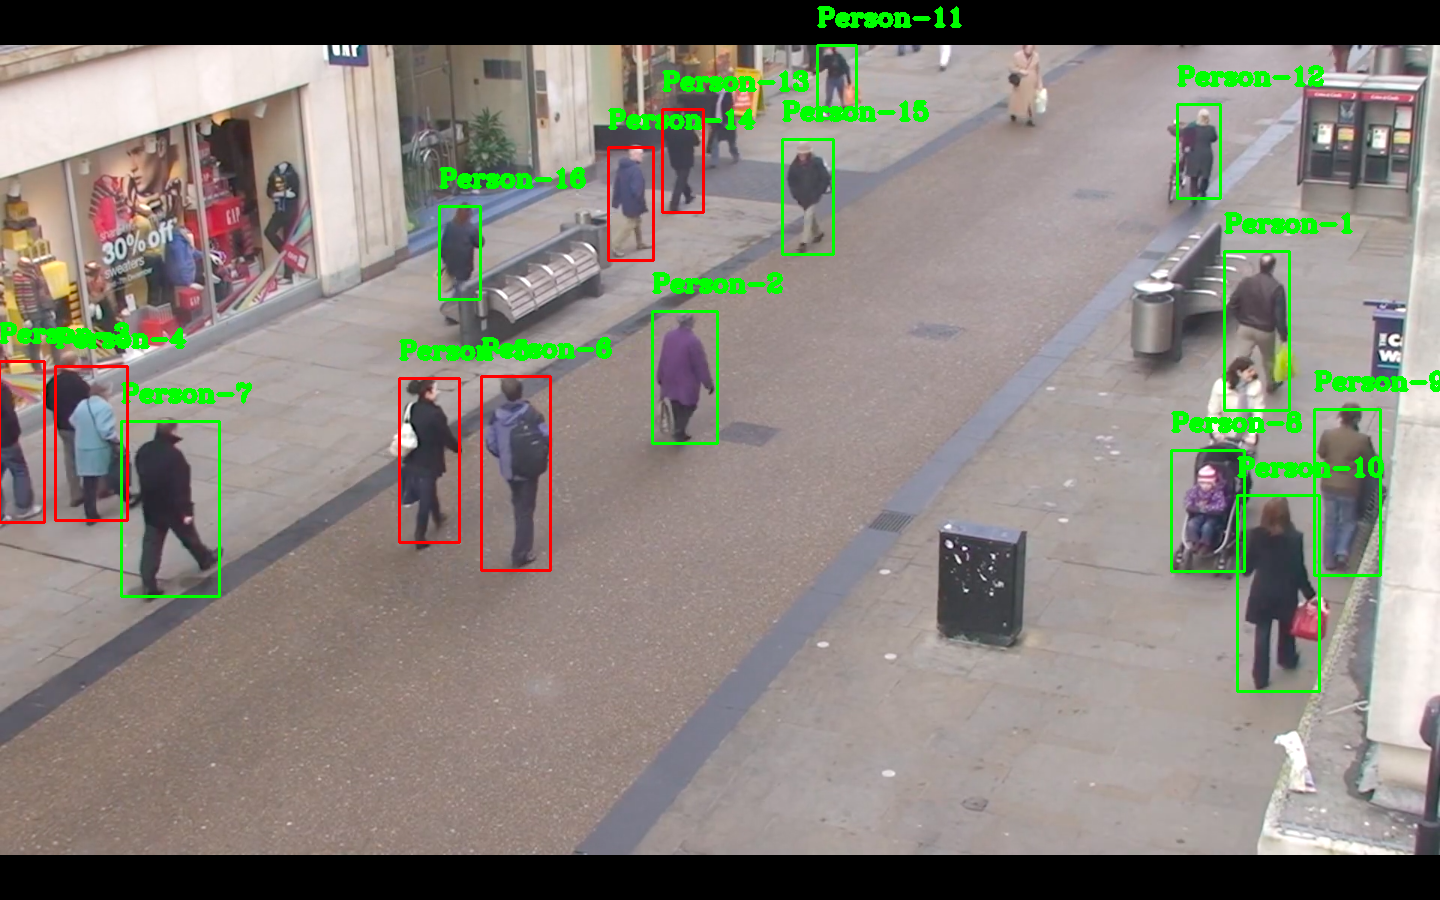

In [ ]:
Image.open("FinalImage.png")